# S&P 500 Stock Data EDA

**Author:** Data Analysis Team  
**Date:** February 6, 2026

This notebook provides an interactive exploratory data analysis of the S&P 500 dataset (2000-2025). It replicates the standard visualization pipeline but allows for interactive exploration.

## 1. Setup and Configuration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pathlib import Path
import sys

# Robust path setup
if os.path.basename(os.getcwd()) == 'EDA':
    os.chdir('../../')
    sys.path.append(os.getcwd())
elif os.path.exists('src'):
    if os.getcwd() not in sys.path:
        sys.path.append(os.getcwd())

try:
    from cookbooks.EDA.eda_utils import get_data_paths
except ImportError:
    sys.path.append(os.getcwd())
    from eda_utils import get_data_paths

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set larger default figure size
plt.rcParams['figure.figsize'] = (14, 6)

# Get paths
try:
    paths = get_data_paths()
    BASE_DIR = paths['analysis_dir']
    DATA_DIR = paths['stock_data_dir']
    print(f"Project paths loaded successfully.")
    print(f"Analysis Dir: {BASE_DIR}")
    print(f"Data Dir: {DATA_DIR}")
except Exception as e:
    print(f"Error loading paths: {e}")
    print("Please ensure you are running this notebook from project root or 'cookbooks/EDA/' directory")

## 2. Load Data

In [ ]:
# Load YoY Analysis and Yearly Summary data
try:
    yoy_df = pd.read_csv(str(BASE_DIR / 'yoy_analysis_full.csv'))
    yearly_df = pd.read_csv(str(BASE_DIR / 'yearly_summary_full.csv'), index_col=0)
    
    print(f"Loaded YoY Analysis: {yoy_df.shape[0]:,} records")
    print(f"Loaded Yearly Summary: {yearly_df.shape[0]} years ({yearly_df.index.min()} - {yearly_df.index.max()})")
except FileNotFoundError:
    print("ERROR: Data files not found. Please run 'yoy_analysis.py' first.")

Loaded YoY Analysis: 74,068 records
Loaded Yearly Summary: 26 years (2000 - 2025)


## 3. Visualization Constants

In [3]:
CRISIS_YEARS = [2008, 2020, 2022]
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'tertiary': '#F18F01',
    'quaternary': '#06A77D',
    'success': '#4ECDC4',
    'warning': '#FF6B6B',
    'info': '#45B7D1'
}

## 4. Trend Analysis

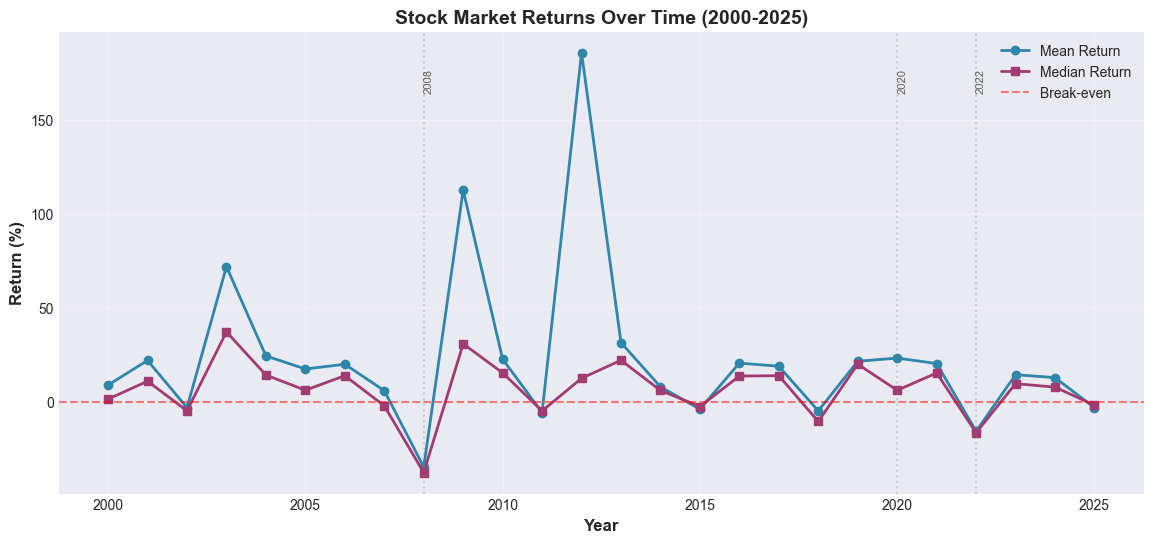

In [ ]:
def plot_yearly_returns(yearly_df):
    fig, ax = plt.subplots(figsize=(14, 6))
    years = yearly_df.index
    mean_returns = yearly_df['YoY_Return_%_mean']
    median_returns = yearly_df['YoY_Return_%_median']
    
    ax.plot(years, mean_returns, marker='o', linewidth=2, label='Mean Return', color=COLORS['primary'])
    ax.plot(years, median_returns, marker='s', linewidth=2, label='Median Return', color=COLORS['secondary'])
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
    
    for year in CRISIS_YEARS:
        if year in years:
            ax.axvline(x=year, color='gray', linestyle=':', alpha=0.3)
            ax.text(year, ax.get_ylim()[1]*0.9, str(year), rotation=90, 
                   verticalalignment='top', fontsize=8, alpha=0.7)
    
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Return (%)', fontsize=12, fontweight='bold')
    ax.set_title('Stock Market Returns Over Time (2000-2025)', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.show()

plot_yearly_returns(yearly_df)

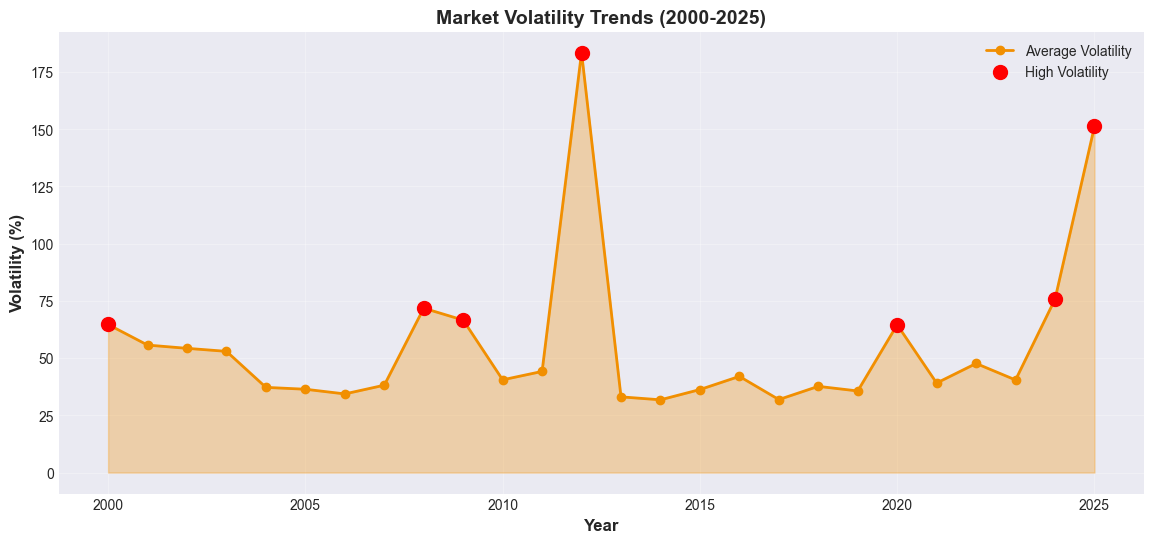

In [ ]:
def plot_volatility(yearly_df):
    fig, ax = plt.subplots(figsize=(14, 6))
    years = yearly_df.index
    volatility = yearly_df['Volatility_%_mean']
    
    ax.plot(years, volatility, marker='o', linewidth=2, color=COLORS['tertiary'], label='Average Volatility')
    ax.fill_between(years, volatility, alpha=0.3, color=COLORS['tertiary'])
    
    high_vol_threshold = volatility.quantile(0.75)
    high_vol_years = years[volatility > high_vol_threshold]
    ax.scatter(high_vol_years, volatility[volatility > high_vol_threshold], 
              color='red', s=100, zorder=5, label='High Volatility')
    
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Volatility (%)', fontsize=12, fontweight='bold')
    ax.set_title('Market Volatility Trends (2000-2025)', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.show()

plot_volatility(yearly_df)

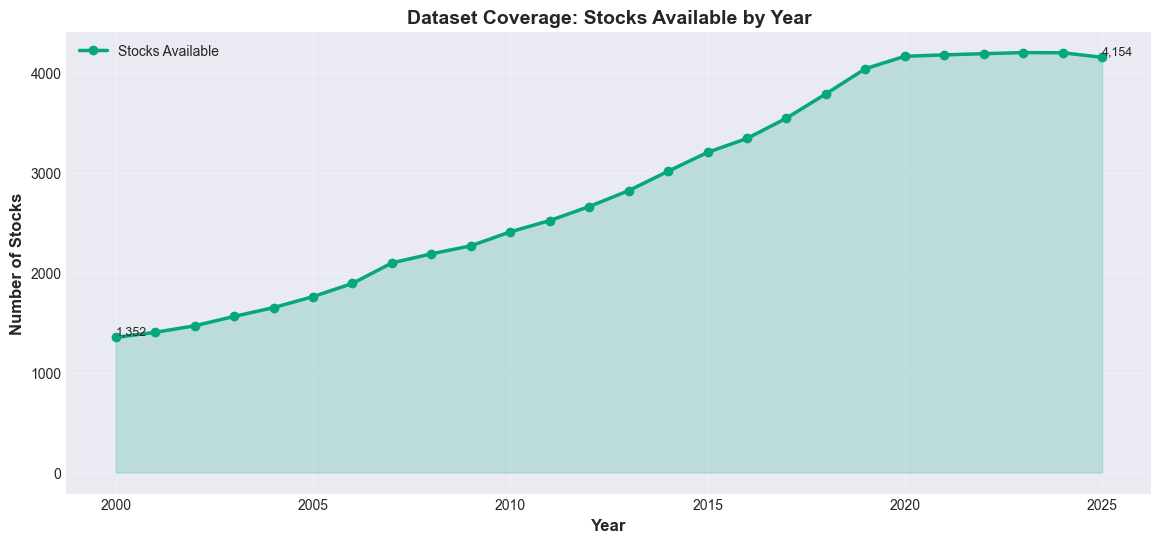

In [ ]:
def plot_coverage(yoy_df):
    coverage = yoy_df.groupby('Year')['Ticker'].nunique().sort_index()
    fig, ax = plt.subplots(figsize=(14, 6))
    
    ax.plot(coverage.index, coverage.values, marker='o', linewidth=2.5, 
           color=COLORS['quaternary'], label='Stocks Available')
    ax.fill_between(coverage.index, coverage.values, alpha=0.2, color=COLORS['quaternary'])
    
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Stocks', fontsize=12, fontweight='bold')
    ax.set_title('Dataset Coverage: Stocks Available by Year', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    ax.text(2000, coverage.iloc[0], f'{coverage.iloc[0]:,}', verticalalignment='bottom', fontsize=9)
    ax.text(2025, coverage.iloc[-1], f'{coverage.iloc[-1]:,}', verticalalignment='bottom', fontsize=9)
    plt.show()

plot_coverage(yoy_df)

## 5. Distribution Analysis

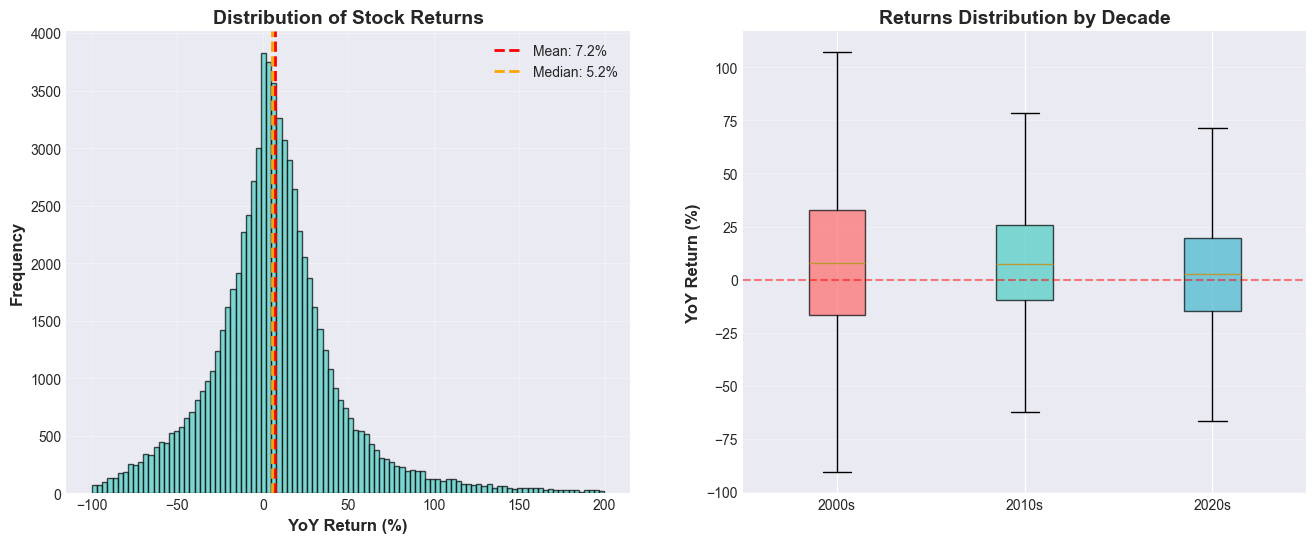

In [ ]:
def plot_returns_distribution(yoy_df):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    returns = yoy_df['YoY_Return_%'].dropna()
    returns_filtered = returns[(returns > -100) & (returns < 200)]
    
    axes[0].hist(returns_filtered, bins=100, color=COLORS['success'], edgecolor='black', alpha=0.7)
    axes[0].axvline(returns_filtered.mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {returns_filtered.mean():.1f}%')
    axes[0].axvline(returns_filtered.median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {returns_filtered.median():.1f}%')
    axes[0].set_xlabel('YoY Return (%)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribution of Stock Returns', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    yoy_df['Decade'] = (yoy_df['Year'] // 10) * 10
    decades_data = [yoy_df[yoy_df['Decade'] == d]['YoY_Return_%'].dropna() for d in [2000, 2010, 2020]]
    
    bp = axes[1].boxplot(decades_data, labels=['2000s', '2010s', '2020s'], 
                         patch_artist=True, showfliers=False)
    for patch, color in zip(bp['boxes'], [COLORS['warning'], COLORS['success'], COLORS['info']]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[1].set_ylabel('YoY Return (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Returns Distribution by Decade', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    plt.show()

plot_returns_distribution(yoy_df)

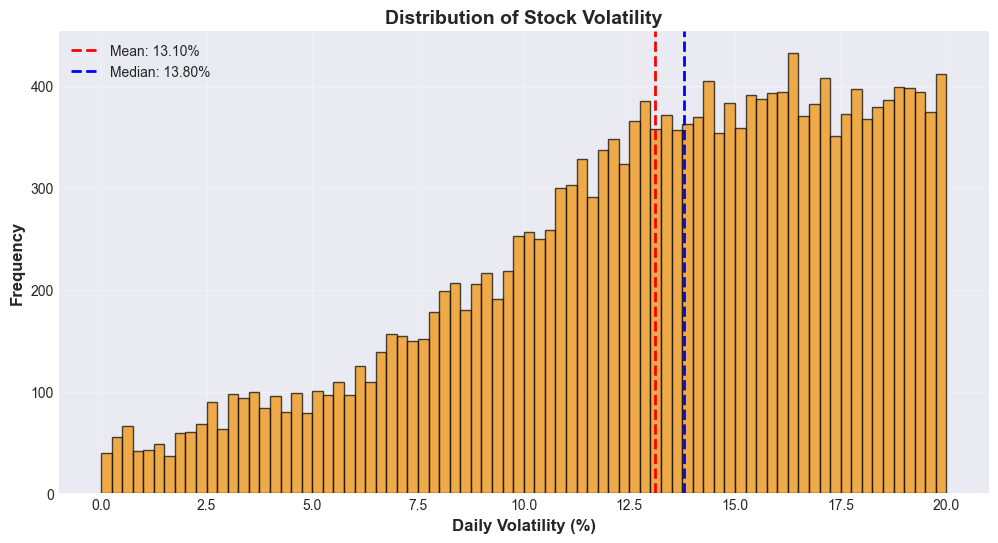

In [ ]:
def plot_volatility_distribution(yoy_df):
    fig, ax = plt.subplots(figsize=(12, 6))
    volatility = yoy_df['Volatility_%'].dropna()
    volatility_filtered = volatility[volatility < 20]
    
    ax.hist(volatility_filtered, bins=80, color=COLORS['tertiary'], edgecolor='black', alpha=0.7)
    ax.axvline(volatility_filtered.mean(), color='red', linestyle='--', 
              linewidth=2, label=f'Mean: {volatility_filtered.mean():.2f}%')
    ax.axvline(volatility_filtered.median(), color='blue', linestyle='--', 
              linewidth=2, label=f'Median: {volatility_filtered.median():.2f}%')
    
    ax.set_xlabel('Daily Volatility (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Stock Volatility', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

plot_volatility_distribution(yoy_df)

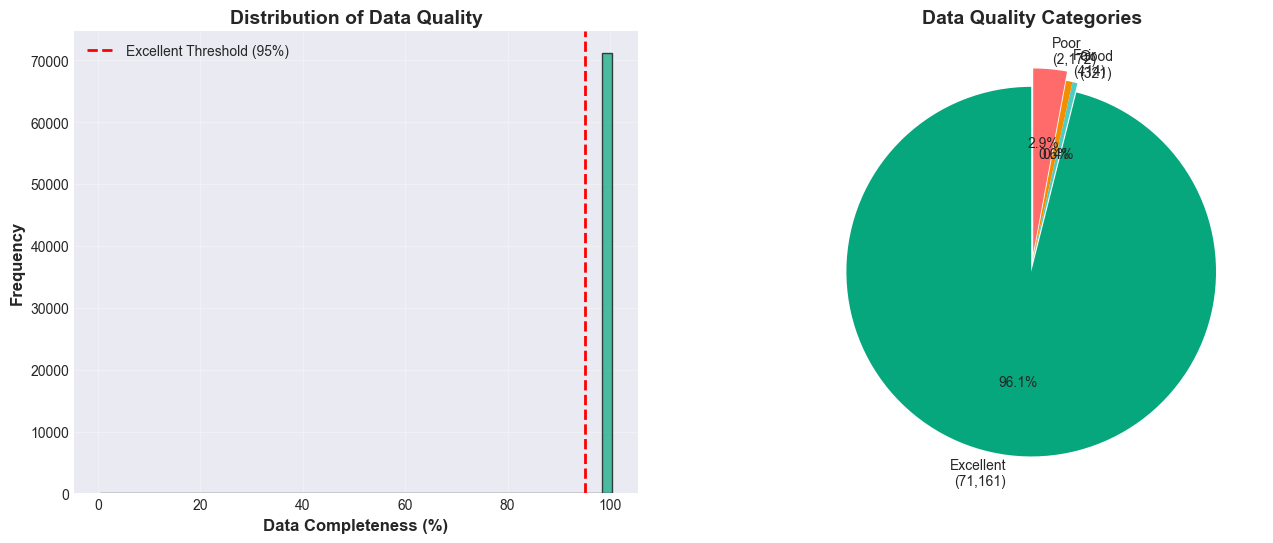

In [ ]:
def plot_data_quality(yoy_df):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    completeness = yoy_df['Data_Completeness_%'].dropna()
    
    axes[0].hist(completeness, bins=50, color=COLORS['quaternary'], edgecolor='black', alpha=0.7)
    axes[0].axvline(95, color='red', linestyle='--', linewidth=2, label='Excellent Threshold (95%)')
    axes[0].set_xlabel('Data Completeness (%)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribution of Data Quality', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    excellent = len(completeness[completeness >= 95])
    good = len(completeness[(completeness >= 85) & (completeness < 95)])
    fair = len(completeness[(completeness >= 70) & (completeness < 85)])
    poor = len(completeness[completeness < 70])
    
    sizes = [excellent, good, fair, poor]
    labels = [f'Excellent\n({excellent:,})', f'Good\n({good:,})', f'Fair\n({fair:,})', f'Poor\n({poor:,})']
    colors = [COLORS['quaternary'], COLORS['success'], COLORS['tertiary'], COLORS['warning']]
    
    axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
               explode=(0.05, 0, 0, 0.05), startangle=90, textprops={'fontsize': 10})
    axes[1].set_title('Data Quality Categories', fontsize=14, fontweight='bold')
    plt.show()

plot_data_quality(yoy_df)

## 6. Correlation Analysis

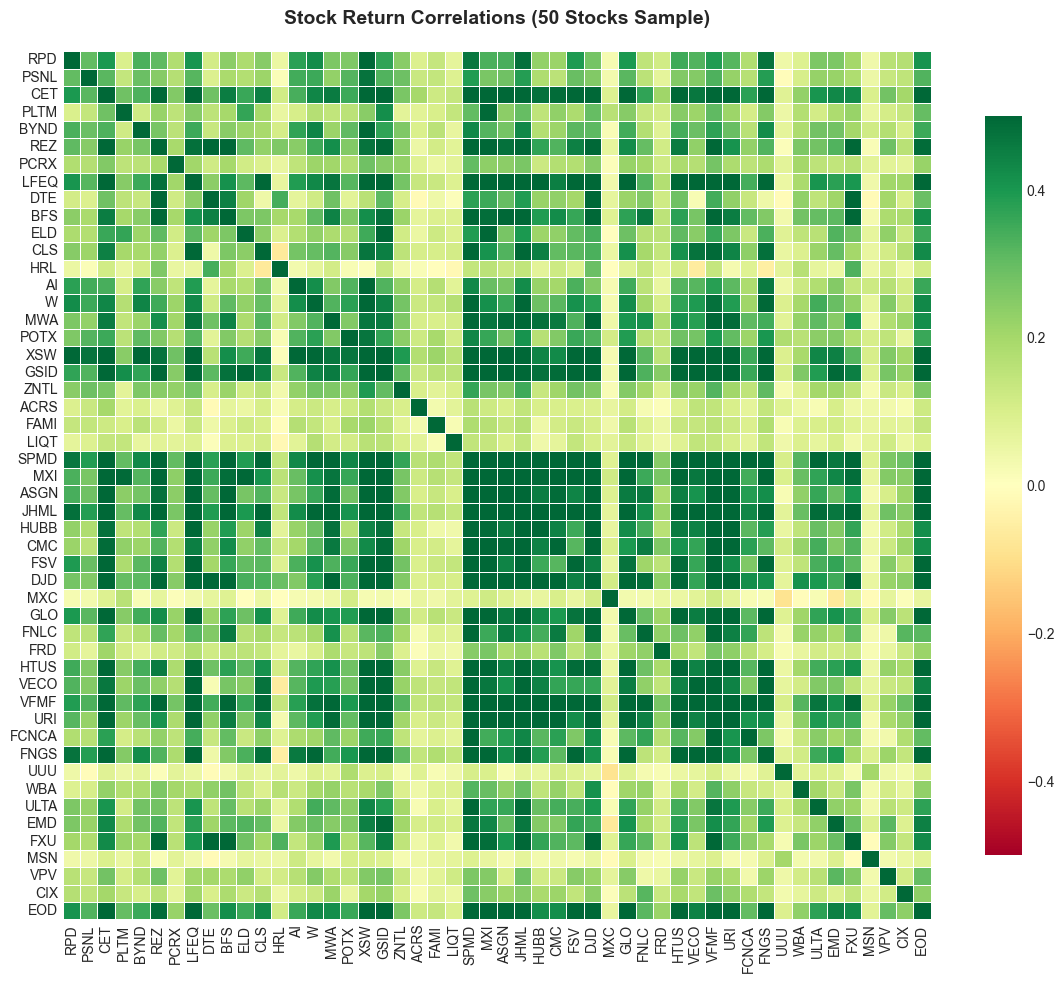

Average correlation: 0.2774


In [ ]:
def plot_stock_correlation(sample_size=50):
    csv_files = [f for f in os.listdir(str(DATA_DIR)) if f.endswith('.csv') and 
                not any(x in f for x in ['yoy_', 'yearly_', 'portfolio'])]
    sample_files = np.random.choice(csv_files, min(sample_size, len(csv_files)), replace=False)
    
    price_data = {}
    for file in sample_files:
        ticker = file.replace('.csv', '').upper()
        try:
            df = pd.read_csv(str(DATA_DIR / file))
            df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce').dt.tz_localize(None)
            df = df.dropna(subset=['Date']).set_index('Date')['Close']
            price_data[ticker] = df
        except:
            continue
    
    price_df = pd.DataFrame(price_data)
    returns_df = price_df.pct_change().dropna()
    corr_matrix = returns_df.corr()
    
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(corr_matrix, cmap='RdYlGn', center=0, square=True, linewidths=0.5, 
               cbar_kws={"shrink": 0.8}, vmin=-0.5, vmax=0.5, ax=ax)
    ax.set_title(f'Stock Return Correlations ({sample_size} Stocks Sample)', 
                fontsize=14, fontweight='bold', pad=20)
    plt.show()
    
    avg_corr = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean()
    print(f"Average correlation: {avg_corr:.4f}")

plot_stock_correlation(sample_size=50)

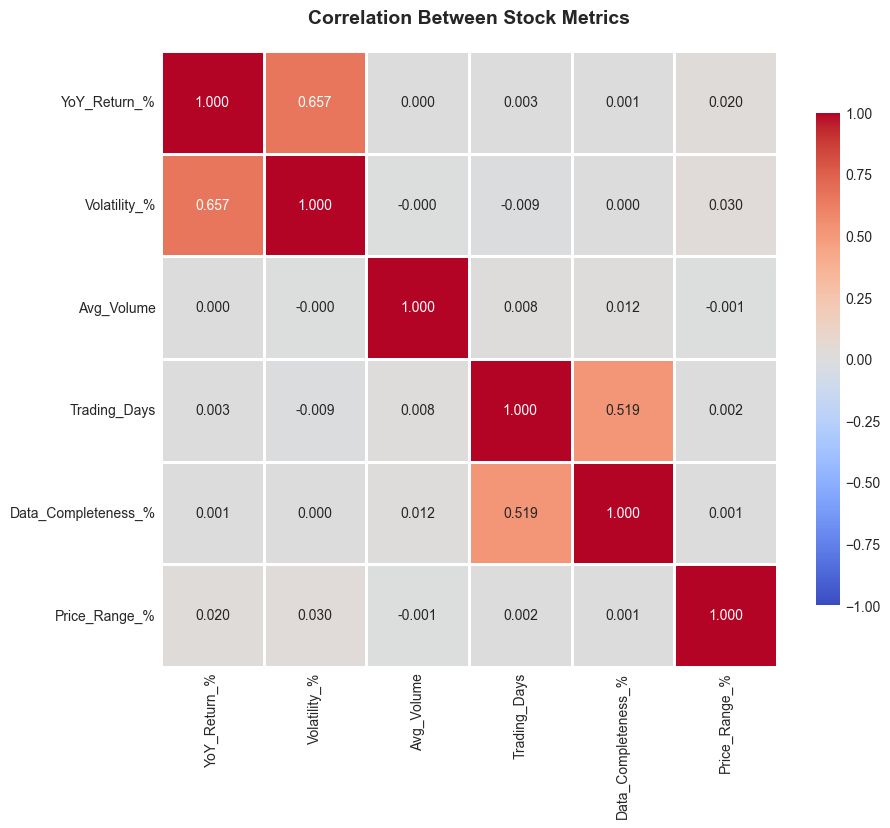

In [ ]:
def plot_metrics_correlation(yoy_df):
    metrics = ['YoY_Return_%', 'Volatility_%', 'Avg_Volume', 'Trading_Days', 
              'Data_Completeness_%', 'Price_Range_%']
    corr_data = yoy_df[metrics].dropna()
    corr_matrix = corr_data.corr()
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
               square=True, linewidths=1, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1, ax=ax)
    ax.set_title('Correlation Between Stock Metrics', fontsize=14, fontweight='bold', pad=20)
    plt.show()

plot_metrics_correlation(yoy_df)

## 7. Time Series Examples

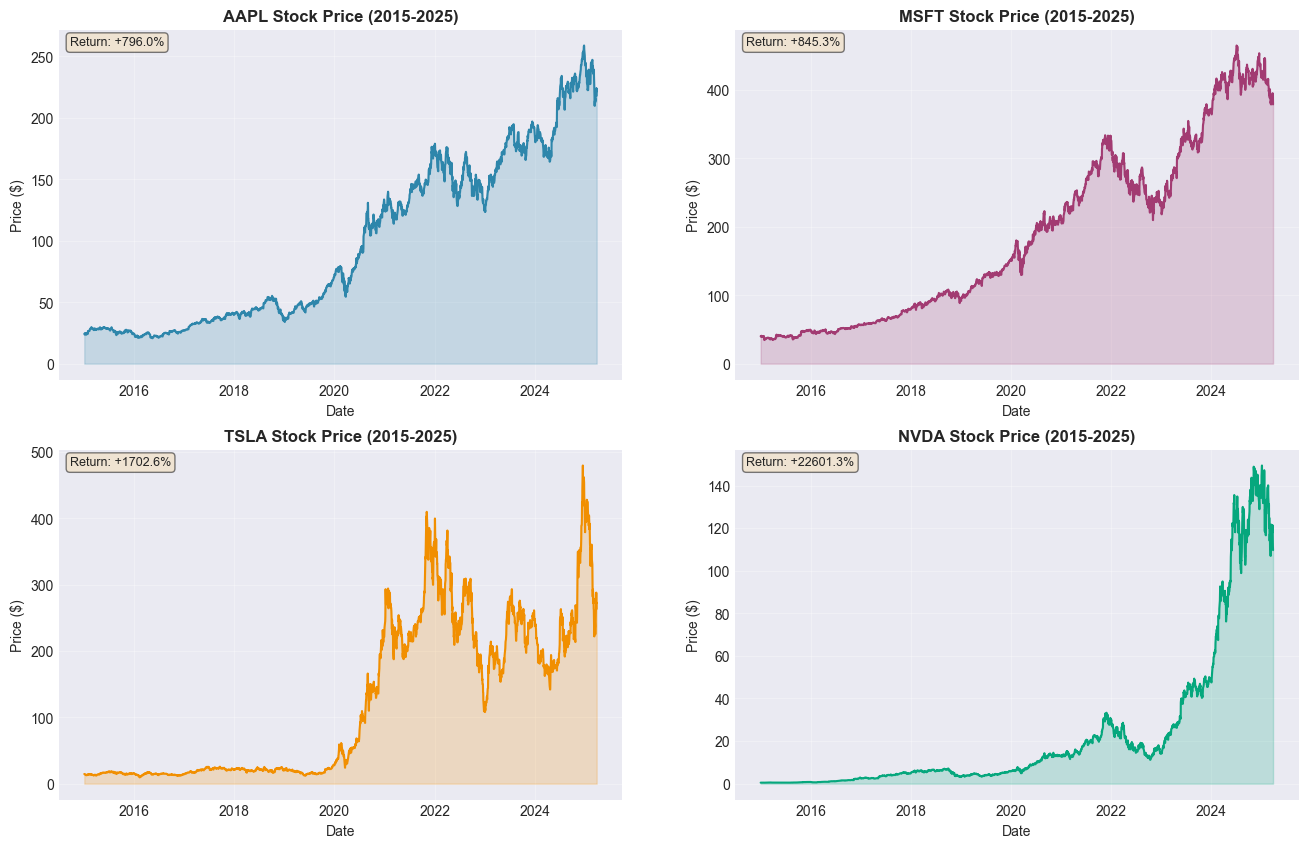

In [ ]:
def plot_sample_stocks(tickers=['AAPL', 'MSFT', 'TSLA', 'NVDA']):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    colors = [COLORS['primary'], COLORS['secondary'], COLORS['tertiary'], COLORS['quaternary']]
    
    for idx, ticker in enumerate(tickers):
        try:
            df = pd.read_csv(str(DATA_DIR / f"{ticker.lower()}.csv"))
            df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce').dt.tz_localize(None)
            df = df.dropna(subset=['Date']).sort_values('Date')
            df = df[df['Date'].dt.year >= 2015]
            
            axes[idx].plot(df['Date'], df['Close'], linewidth=1.5, color=colors[idx])
            axes[idx].fill_between(df['Date'], df['Close'], alpha=0.2, color=colors[idx])
            axes[idx].set_title(f'{ticker} Stock Price (2015-2025)', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Date', fontsize=10)
            axes[idx].set_ylabel('Price ($)', fontsize=10)
            axes[idx].grid(True, alpha=0.3)
            
            total_return = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
            axes[idx].text(0.02, 0.98, f'Return: {total_return:+.1f}%', transform=axes[idx].transAxes, 
                          verticalalignment='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        except:
            axes[idx].text(0.5, 0.5, f'{ticker}\nData not available', ha='center', va='center', fontsize=12)
            axes[idx].set_title(f'{ticker} - No Data', fontsize=12)
    
    plt.show()

plot_sample_stocks(['AAPL', 'MSFT', 'TSLA', 'NVDA'])

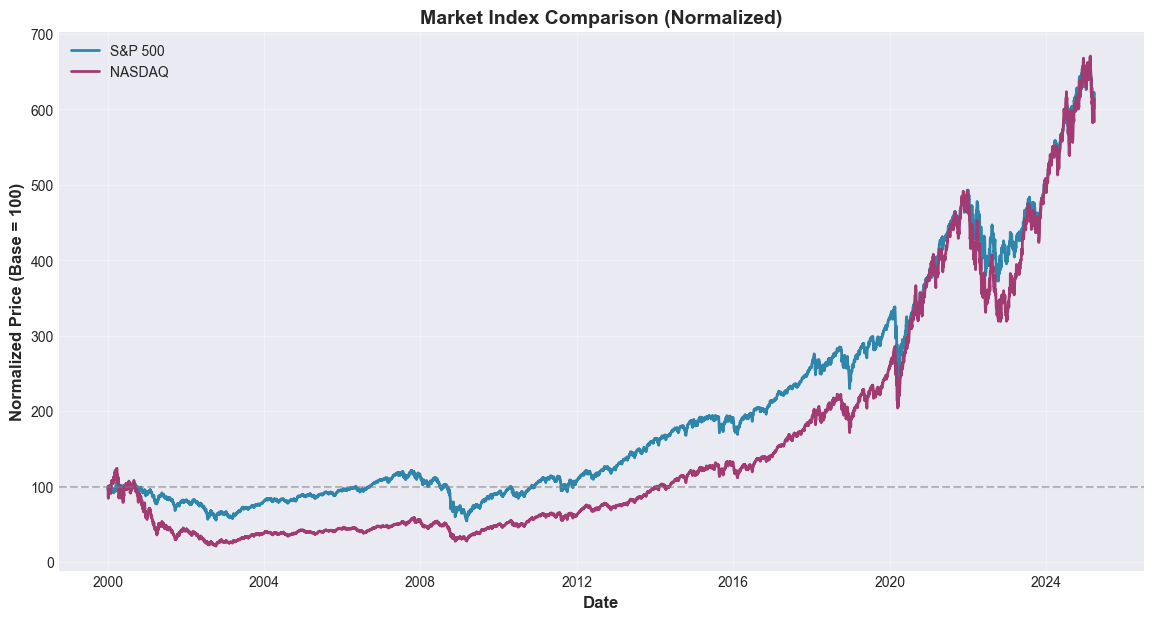

In [ ]:
def plot_market_comparison():
    tickers = ['SPY', 'QQQ', 'DIA', 'IWM']
    labels = ['S&P 500', 'NASDAQ', 'Dow Jones', 'Russell 2000']
    colors = [COLORS['primary'], COLORS['secondary'], COLORS['tertiary'], COLORS['quaternary']]
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    for ticker, label, color in zip(tickers, labels, colors):
        try:
            df = pd.read_csv(str(DATA_DIR / f"{ticker.lower()}.csv"))
            df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce').dt.tz_localize(None)
            df = df.dropna(subset=['Date']).sort_values('Date')
            df['Normalized'] = (df['Close'] / df['Close'].iloc[0]) * 100
            ax.plot(df['Date'], df['Normalized'], linewidth=2, label=label, color=color)
        except:
            continue
    
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Normalized Price (Base = 100)', fontsize=12, fontweight='bold')
    ax.set_title('Market Index Comparison (Normalized)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
    plt.show()

plot_market_comparison()